In [ ]:
pip install tensorflow

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],
                          X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],
                        X_test.shape[2],1)

In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/= 255.0
X_test/=255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam' ,
              loss ='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if(logs.get('accuracy')>=0.992):
            print("\nReached 99.2% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(X_train,Y_train, epochs = 15,
                    validation_data=(X_test,Y_test),
                    callbacks = [callbacks])

Epoch 1/15
1875/1875 [==============================] - 137s 72ms/step - loss: 0.1647 - accuracy: 0.9482 - val_loss: 0.0415 - val_accuracy: 0.9859
Epoch 2/15
1875/1875 [==============================] - 132s 71ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0394 - val_accuracy: 0.9894
Epoch 3/15
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0277 - val_accuracy: 0.9909
Epoch 4/15
1875/1875 [==============================] - 136s 73ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0271 - val_accuracy: 0.9919
Epoch 5/15
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0314 - val_accuracy: 0.9910
Epoch 6/15
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0206 - val_accuracy: 0.9939
Epoch 7/15
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0

In [ ]:
pip install opencv-python

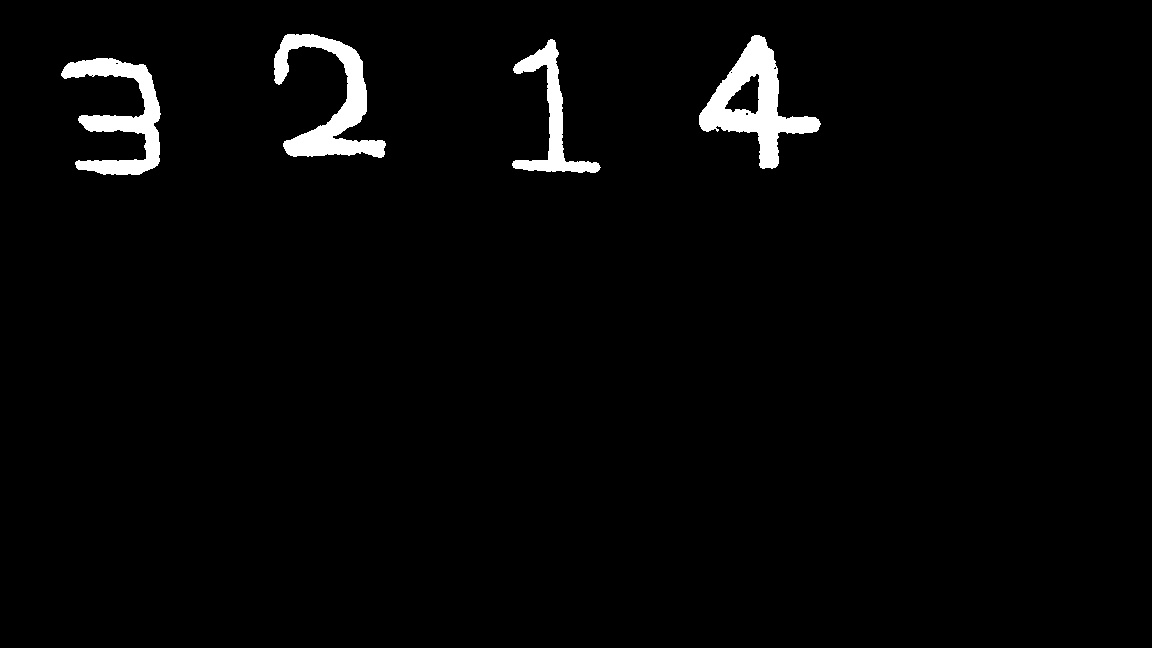

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def prepImg(data):
    return cv2.resize(data,(28,28)).reshape(28,28,1)/255.0

img = cv2.imread("input2.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5) , 0)
ret , im_th = cv2.threshold(blur, 180 , 400 , cv2.THRESH_BINARY_INV)
ctrs , hier = cv2.findContours(im_th.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

cv2_imshow(im_th)
cv2.waitKey(0)

1/1 [==============================] - 0s 24ms/step


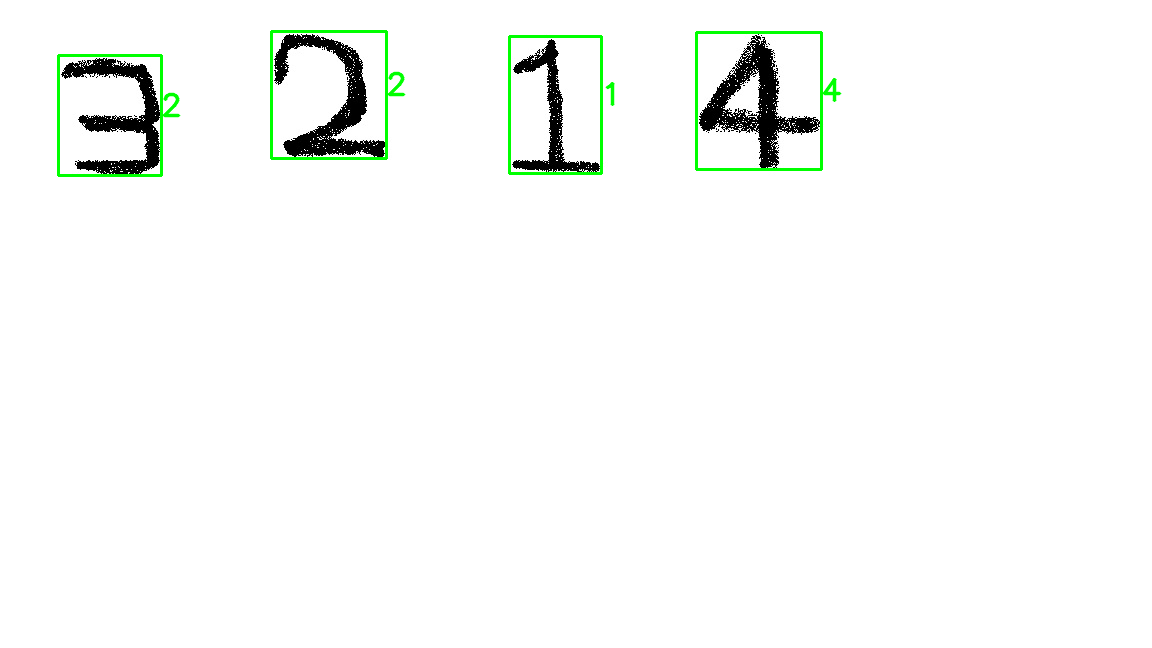

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
for x,y,w,h in rects :

    if y>=3:
        y-=3
    else :
        y=0
    if x>=3:
        x-=3
    else:
        x=0
    w+=3
    h+=3
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    sliced = im_th[y:y+h,x:x+w]
    sliced = img_to_array(sliced,dtype='float32')
    sliced = prepImg(sliced)
    sliced = np.expand_dims(sliced , axis = 0)
    #prediction = model.predict_classes(sliced)
    prediction = np.argmax(model.predict(sliced),axis=1)
    cv2.putText(img, str(prediction[0]), (x+w,y+int(h/2)), cv2.FONT_HERSHEY_SIMPLEX ,  1, (0,255,0) , 2, cv2.LINE_AA)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()